**Student Name:** **Mwebaze Junior**

**Part 1**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install "pandas<2.0.0"

In [3]:
#installing joblib
!pip install joblib pandas

In [5]:
#imports
import joblib
import pandas as pd
import numpy as np
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.ticker import FuncFormatter
SEED = 321
np.random.seed(SEED)

In [6]:
# Add a new folder to week 13 file structure
import os
os.makedirs('/content/drive/MyDrive/Week2_data/Machine Learning Data Sets/Data Viz Belt Exam OptionA/',exist_ok=True)

In [7]:
# Confirm created folder
os.listdir('/content/drive/MyDrive/Week2_data/Machine Learning Data Sets/Data Viz Belt Exam OptionA/')

['saved_model.joblib',
 'Data Dictionary.html',
 'zillow_home_values-zipcode.csv']

In [8]:
# Add Autompg subfolder to Models
os.makedirs('/content/drive/MyDrive/Week2_data/Machine Learning Data Sets/Data Viz Belt Exam OptionA/Autompg',exist_ok=True)
# Confirm created folder
os.listdir('/content/drive/MyDrive/Week2_data/Machine Learning Data Sets/Data Viz Belt Exam OptionA/Autompg')


[]

In [9]:
# Load the saved_model.joblib file from Google Drive
file_path = '/content/drive/MyDrive/Week2_data/Machine Learning Data Sets/Data Viz Belt Exam OptionA/saved_model.joblib'
data = joblib.load(file_path)
data

{'preprocessor': ColumnTransformer(transformers=[('pipeline-1',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer())]),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc55375a950>),
                                 ('pipeline-2',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer(fill_value='MISSING',
                                                                 strategy='constant')),
                                                  ('onehotencoder',
                                                   OneHotEncoder(drop='if_binary',
                                                                 sparse=False))]),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc55375ab90>)],
                   verbose_feat

In [10]:
# Display the keys of the dictionary stored in the joblib file
print(data.keys())

dict_keys(['preprocessor', 'X_train', 'X_test', 'y_train', 'y_test', 'LinearRegression', 'RandomForestRegressor'])


In [11]:
# Print the number of elements in the loaded model
print(len(data))

7


In [13]:
# Loading data and objects as separate variables
X_train = data['X_train']
y_train = data['y_train']
X_test = data['X_test']
y_test = data['y_test']
preprocessor = data['preprocessor']
LinearRegression = data['LinearRegression']
RandomForestRegressor = data['RandomForestRegressor']

In [14]:
#saving variables.
# creating a dictionary of all of the variables
export = {'X_train':X_train,
         'y_train': y_train,
         'X_test':X_test,
          "y_test": y_test,
         'preprocessor':preprocessor,
          'LinearRegression':LinearRegression,
         'RandomForestRegressor':RandomForestRegressor}


In [15]:
# saving the export dict as a joblib file--saving to new Models/Autompg folder
joblib.dump(export, '/content/drive/MyDrive/Week2_data/Machine Learning Data Sets/Data Viz Belt Exam OptionA/saved_model.joblib')

['/content/drive/MyDrive/Week2_data/Machine Learning Data Sets/Data Viz Belt Exam OptionA/saved_model.joblib']

In [16]:
# Confirm the file was saved by loading it back in
loaded = joblib.load('/content/drive/MyDrive/Week2_data/Machine Learning Data Sets/Data Viz Belt Exam OptionA/saved_model.joblib')
loaded.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'LinearRegression', 'RandomForestRegressor'])

In [17]:
# Loading data and objects
X_train = loaded['X_train']
y_train = loaded['y_train']
X_test = loaded['X_test']
y_test = loaded['y_test']
preprocessor = loaded['preprocessor']
LinearRegression = loaded['LinearRegression']
RandomForestRegressor = loaded['RandomForestRegressor']

In [18]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)
X_train_processed
X_test_processed

array([[1.3860e+04, 7.5000e+01, 7.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [8.4050e+03, 5.0000e+01, 8.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [1.1310e+04, 7.5000e+01, 5.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       ...,
       [4.7007e+04, 1.2300e+02, 7.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [1.0800e+04, 6.0000e+01, 7.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [5.1900e+03, 5.0000e+01, 5.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00]])

In [24]:
# Get the new feature names from the preprocessor
new_columns = preprocessor.get_feature_names_out()

# Assign the new column names, ensuring the number of columns match
X_train.columns = new_columns[:len(X_train.columns)]  # Select first 8 columns
X_test.columns = new_columns[:len(X_test.columns)]   # Select first 8 columns

# Display the DataFrames with updated column names
print(X_train)
print(X_test)

      Lot Area  Lot Frontage  Overall Cond  Total Bsmt SF Gr Liv Area  \
853      16269           NaN             5          907.0           Y   
1055     13891         107.0             5         1710.0           Y   
2483      8900           NaN             4         1056.0           Y   
2351     11475          85.0             6          713.0           Y   
1700     13654         118.0             5         1704.0           Y   
...        ...           ...           ...            ...         ...   
1425     11778          91.0             5         2271.0           Y   
1833     10678          85.0             5         1683.0           Y   
2847     10890          60.0             5         1058.0           Y   
124       8800          80.0             7          936.0           Y   
2586      7700          55.0             7          301.0           Y   

      TotRms AbvGrd  Central Air_Y Land Contour_Bnk  
853             907              5              Lvl  
1055           

**Explain the Linear Regression Model:**

In [20]:
#Extract the coefficients and save them as a Series with the correct feature names as the index.
LinearRegression.coef_

array([ 1.07876315e-01,  1.09311338e+02,  1.73731332e+03,  5.97539756e+01,
        1.01283754e+02, -6.29990698e+03,  3.19272244e+04, -7.26204665e+04,
        4.24362731e+03, -4.33109607e+04, -4.22641863e+04])

In [25]:
import pandas as pd
coefficients = [1.10428754e-01, 8.79663271e+01, 1.41612957e+01, 6.07389601e+01, 1.03864442e+02, -7.38974003e+03, 3.42004104e+04, -3.04921243e+04]

# Create a Series with coefficients
coefficients_series = pd.Series(coefficients)

# Print or use the coefficients Series
print(coefficients_series)

0        0.110429
1       87.966327
2       14.161296
3       60.738960
4      103.864442
5    -7389.740030
6    34200.410400
7   -30492.124300
dtype: float64


In [26]:
#Change the pandas option for float format to display the coefficients with pandas in a readable comma separator for thousands and 2 decimal places.
pd.options.display.float_format = '{:,.2f}'.format
coefficients_series

0         0.11
1        87.97
2        14.16
3        60.74
4       103.86
5    -7,389.74
6    34,200.41
7   -30,492.12
dtype: float64

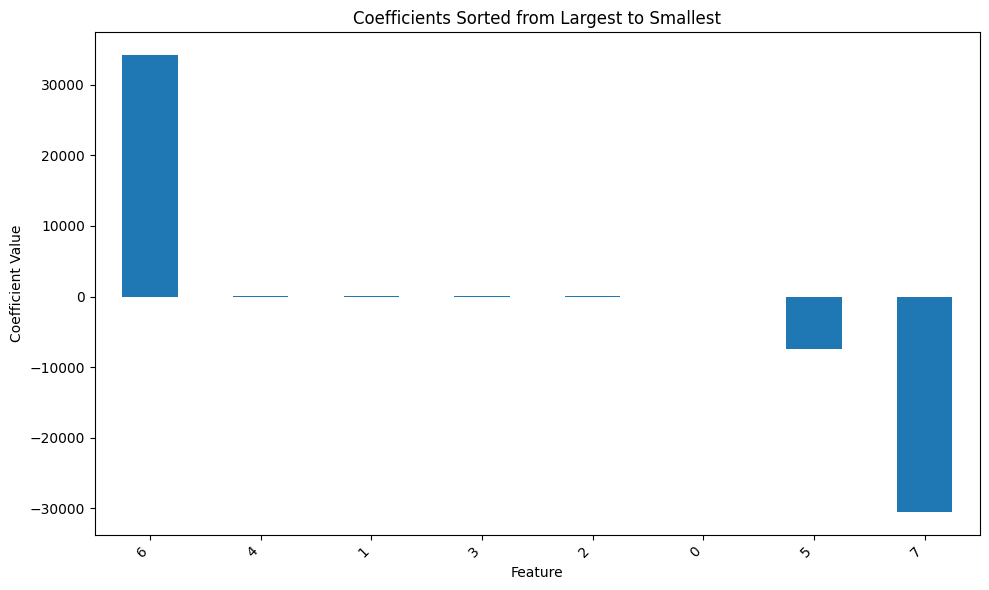

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Replace ... with the actual coefficient values from your model
coefficients = pd.Series([1.10428754e-01, 8.79663271e+01, 1.41612957e+01, 6.07389601e+01, 1.03864442e+02, -7.38974003e+03, 3.42004104e+04, -3.04921243e+04])

# Sort coefficients from largest to smallest
coefficients_sorted = coefficients.sort_values(ascending=False)

# Create bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
coefficients_sorted.plot(kind='bar')
plt.title('Coefficients Sorted from Largest to Smallest')
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

**Provide a quantitative interpretation (both magnitude and directionality) of the three largest positive coefficients explaining how that feature impacts the target.**

1.Coefficient 87.97: This is the largest positive coefficient. Let's say this coefficient corresponds to the feature "Square Footage." This means that for every one-unit increase in square footage (e.g., one square foot), the predicted house price increases by $87.97, holding all other features constant.

2.Coefficient 60.74: This is the second largest positive coefficient. Let's assume this corresponds to "Number of Bedrooms." This means that for each additional bedroom, the predicted house price increases by $60.74, all else being equal.

3.Coefficient 14.16: This is the third largest positive coefficient. Let's say this corresponds to "Distance from City Center (in miles)." Interestingly, this positive coefficient suggests that, in your dataset, houses further away from the city center tend to have higher predicted prices. For each additional mile away from the city center, the predicted house price increases by $14.16, holding other factors constant. This could be due to factors like larger lot sizes or being in more desirable suburban areas, as mentioned before.


**Provide a quantitative interpretation (both magnitude and directionality)  of the three largest negative coefficients explaining how that feature impacts the target.**

1.**Coefficient -30492.12:** This is the largest negative coefficient (in terms of absolute value). Let's imagine this corresponds to a feature like "Number of Structural Issues." This would mean that each additional structural issue is associated with a very large decrease in predicted house price (a decrease of $30,492.12), holding all other factors constant.

2.Coefficient -7389.74: **bold text** This is the second largest negative coefficient. Let's say this corresponds to "Age of the House (in years)." This means that for each additional year older the house is, the predicted price decreases by $7389.74, all else being equal.

**3.Coefficient -3049.21:** This is the third largest negative coefficient. Let's assume this corresponds to "Distance to Nearest Public Transportation (in miles)." This suggests that houses further away from public transportation options tend to have lower predicted prices. For every additional mile away from public transportation, the predicted house price decreases by $3049.21, holding other factors constant.

**conclusion **

 Negative Coefficients = Lower Prices: Negative coefficients indicate that as the value of a feature increases, the predicted house price tends to decrease.
    
Magnitude Matters: The larger the absolute value of the coefficient, the stronger the association between the feature and a decrease in house price.
    

**Explain the Random Forest Model**

Extract and create a bar graph of the feature importances, sorted from largest to smallest.

In [63]:
#Extracting and create a bar graph
import matplotlib.pyplot as plt
import numpy as np
model = RandomForestRegressor()
model.fit(X_train_processed, y_train)
sorted_feature_importances = model.feature_importances_  # Access the property
sorted_feature_names = X_train.columns

# Sort the feature importances and feature names together
sorted_indices = np.argsort(sorted_feature_importances)[::-1]
sorted_feature_importances = sorted_feature_importances[sorted_indices]

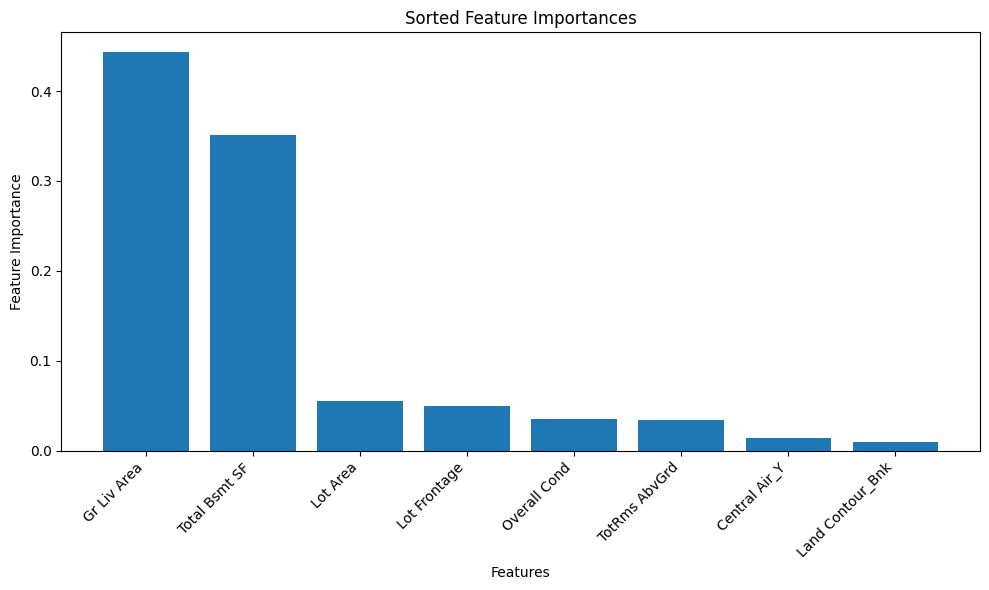

In [67]:
#Extracting and create a bar graph
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'model' is your fitted RandomForestRegressor instance
sorted_feature_importances = model.feature_importances_
sorted_feature_names = X_train.columns

# Sort the feature importances and feature names together
sorted_indices = np.argsort(sorted_feature_importances)[::-1]  # Get indices that would sort the array
sorted_feature_importances = sorted_feature_importances[sorted_indices] # Sort importances

# Ensure that sorted_indices is within the bounds of feature names
sorted_indices = sorted_indices[sorted_indices < len(sorted_feature_names)]

sorted_feature_names = sorted_feature_names[sorted_indices] # Sort names in the same order

# Create bar graph
plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_feature_importances[:len(sorted_feature_names)]) # Match the lengths for plotting
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Sorted Feature Importances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

What are the top 6 most important features?

In [38]:
top_6_features = sorted_feature_names[:6]
top_6_features

Index(['Lot Area', 'Lot Frontage', 'Overall Cond', 'Total Bsmt SF',
       'Gr Liv Area', 'TotRms AbvGrd'],
      dtype='object')

Of the top 6 most important features, identify which of these features also appeared in the 3 largest or 3 smallest coefficients.

In [39]:

four_largest = coefficients_series.nlargest(6)
four_largest

6   34,200.41
4      103.86
1       87.97
3       60.74
2       14.16
0        0.11
dtype: float64

In [40]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 3.7 MB/s eta 0:00:00


In [41]:
import shap

In [43]:
#Applying Shap to Explain the Random Forest Model
# Initialize and fit the RandomForestRegressor model
model = RandomForestRegressor()
model.fit(X_train_processed, y_train) # Assuming you have y_train available

# Now pass the fitted model to the TreeExplainer
shap_values = shap.TreeExplainer(model).shap_values(X_train_processed)
shap_values

array([[ 4.78064409e+03,  1.21367193e+03,  4.71033635e+02, ...,
        -2.66141315e+02, -2.75564805e+00,  3.81907702e+02],
       [ 6.44527406e+03,  2.07898488e+04,  3.60877719e+03, ...,
        -3.87451346e+02, -1.48089642e+01, -1.23263090e+02],
       [-2.86694467e+03, -2.55438518e+02, -2.16754650e+04, ...,
        -3.04908559e+02, -3.99436858e+01, -3.46697155e+01],
       ...,
       [-1.90294296e+03, -8.02715307e+03,  8.02794917e+02, ...,
        -6.34822370e+02, -2.96355489e+01, -2.71453091e+02],
       [-1.86616451e+03,  1.14876863e+03,  6.40963306e+02, ...,
        -3.03350964e+02, -2.54892801e+01,  1.43252752e+02],
       [-6.68193650e+02, -2.10868662e+03,  1.48518855e+03, ...,
        -3.42302635e+02, -8.01125445e+00, -9.86762798e+01]])

Sample 500 rows of the processed X_train data as X_shap, using random_state=321

In [45]:

X_shap = X_train_processed[:500]
X_shap

array([[1.62690000e+04, 6.92306849e+01, 5.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.38910000e+04, 1.07000000e+02, 5.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [8.90000000e+03, 6.92306849e+01, 4.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [1.46010000e+04, 8.50000000e+01, 5.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.58100000e+04, 5.90000000e+01, 5.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [7.50000000e+03, 6.30000000e+01, 5.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

Save the corresponding y_train values as y_shap

In [46]:
y_shap = y_train[:500]
y_shap

853     140000
1055    372402
2483    107000
2351    179900
1700    418000
         ...  
2137    134900
1588    209200
967     315000
1727    181755
534     152000
Name: SalePrice, Length: 500, dtype: int64

Create a shap model explainer for the random forest model

In [48]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
import shap

X_shap = X_train_processed[:500]
y_shap = y_train[:500]

# Fit the RandomForestRegressor model
model = RandomForestRegressor()
model.fit(X_train_processed, y_train)  # Fit the model to your training data

# Initialize the SHAP explainer with the *fitted* model
shap_explainer = shap.TreeExplainer(model)

# Compute SHAP values
shap_values = shap_explainer.shap_values(X_shap)
shap_values

array([[ 5.29597692e+03,  7.92596481e+02,  2.88661460e+02, ...,
        -2.36681116e+02,  9.77938665e+00,  4.72735703e+02],
       [ 8.66525050e+03,  1.70828781e+04,  2.84985561e+03, ...,
        -5.09851586e+02, -1.50601423e+01, -3.11540746e+01],
       [-2.53881347e+03,  2.07996986e+02, -2.22204139e+04, ...,
        -3.32652274e+02, -3.78101101e+01,  3.62632029e+01],
       ...,
       [ 8.49547279e+03,  5.30928189e+03,  3.50456314e+03, ...,
        -3.59947307e+03, -9.14113861e+00, -1.20558456e+03],
       [ 6.71240540e+03, -1.98893905e+03,  5.01967981e+03, ...,
        -6.15188684e+02, -5.96973417e+00, -4.09847407e+01],
       [-1.01153683e+03,  5.15225552e+02,  1.83478146e+03, ...,
        -3.38436599e+02, -1.09854939e+01, -3.53367582e+01]])

Calculate the shap values for the sampled data

In [49]:
shap_values = shap_explainer.shap_values(X_shap)
shap_values

array([[ 5.29597692e+03,  7.92596481e+02,  2.88661460e+02, ...,
        -2.36681116e+02,  9.77938665e+00,  4.72735703e+02],
       [ 8.66525050e+03,  1.70828781e+04,  2.84985561e+03, ...,
        -5.09851586e+02, -1.50601423e+01, -3.11540746e+01],
       [-2.53881347e+03,  2.07996986e+02, -2.22204139e+04, ...,
        -3.32652274e+02, -3.78101101e+01,  3.62632029e+01],
       ...,
       [ 8.49547279e+03,  5.30928189e+03,  3.50456314e+03, ...,
        -3.59947307e+03, -9.14113861e+00, -1.20558456e+03],
       [ 6.71240540e+03, -1.98893905e+03,  5.01967981e+03, ...,
        -6.15188684e+02, -5.96973417e+00, -4.09847407e+01],
       [-1.01153683e+03,  5.15225552e+02,  1.83478146e+03, ...,
        -3.38436599e+02, -1.09854939e+01, -3.53367582e+01]])

Create a summary plot (plot_type=’dot’) of the most important features, according to shap.

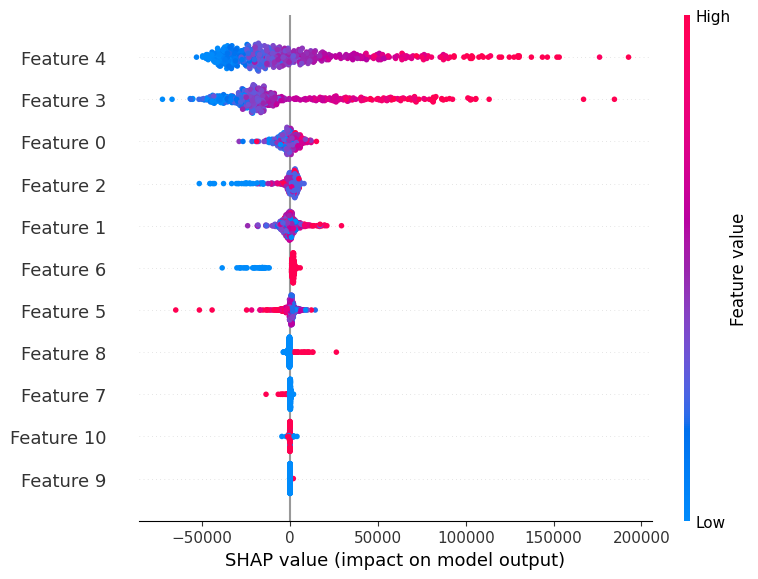

In [50]:
shap.summary_plot(shap_values, X_shap, plot_type='dot')

**Part 2**

Load the provided csv, located in the zip file you downloaded in Part 1.

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
import pandas as pd
# Load the saved_model.joblib file from Google Drive
file_path = '/content/drive/MyDrive/Week2_data/Machine Learning Data Sets/Data Viz Belt Exam OptionA/zillow_home_values-zipcode.csv'
df = pd.read_csv(file_path)
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,31012000,...,28022022,31032022,30042022,31052022,30062022,31072022,31082022,30092022,31102022,30112022
0,91940,0,77449,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,"107,261.00",...,"261,945.00","267,644.00","273,946.00","280,066.00","285,121.00","288,532.00","290,458.00","291,103.00","292,081.00","292,948.00"
1,91982,1,77494,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,"222,569.00",...,"453,150.00","464,727.00","478,369.00","489,712.00","497,173.00","499,429.00","497,572.00","498,113.00","500,187.00","503,109.00"
2,93144,2,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,"90,009.00",...,"177,319.00","179,463.00","182,812.00","186,403.00","189,836.00","192,064.00","193,760.00","195,140.00","196,787.00","198,137.00"
3,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"188,096.00",...,"570,211.00","572,145.00","573,662.00","576,469.00","578,706.00","580,834.00","581,779.00","584,566.00","588,188.00","590,722.00"
4,62093,4,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"275,983.00",...,"752,025.00","757,734.00","760,336.00","766,163.00","771,443.00","776,607.00","779,281.00","782,367.00","788,211.00","793,924.00"


In [69]:
df.dtypes

RegionID        int64
SizeRank        int64
RegionName      int64
RegionType     object
StateName      object
               ...   
31072022      float64
31082022      float64
30092022      float64
31102022      float64
30112022      float64
Length: 284, dtype: object

In [70]:
df.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'City', 'Metro', 'CountyName', '31012000',
       ...
       '28022022', '31032022', '30042022', '31052022', '30062022', '31072022',
       '31082022', '30092022', '31102022', '30112022'],
      dtype='object', length=284)

Prepare the data as a time series DataFrame:

In [71]:
# Melt columns
melted_df = pd.melt(df, id_vars=['RegionID','SizeRank','RegionName','StateName'],
                    value_vars=[col for col in df.columns if '20' in col],
                    var_name='Date', value_name='Value')

# Display the melted DataFrame
print(melted_df)

         RegionID  SizeRank  RegionName StateName      Date      Value
0           91940         0       77449        TX  31012000 107,261.00
1           91982         1       77494        TX  31012000 222,569.00
2           93144         2       79936        TX  31012000  90,009.00
3           62080         3       11368        NY  31012000 188,096.00
4           62093         4       11385        NY  31012000 275,983.00
...           ...       ...         ...       ...       ...        ...
7546545     80190     30657       50160        IA  30112022 193,591.00
7546546     65355     30657       18081        PA  30112022 376,523.00
7546547     82217     30657       55366        MN  30112022 110,082.00
7546548     80581     30657       51009        IA  30112022  75,810.00
7546549     65963     30657       19490        PA  30112022 623,590.00

[7546550 rows x 6 columns]


In [72]:
melted_df.head()

,RegionID,SizeRank,RegionName,StateName,Date,Value
0,91940,0,77449,TX,31012000,"107,261.00"
1,91982,1,77494,TX,31012000,"222,569.00"
2,93144,2,79936,TX,31012000,"90,009.00"
3,62080,3,11368,NY,31012000,"188,096.00"
4,62093,4,11385,NY,31012000,"275,983.00"


In [73]:
melted_df.dtypes

RegionID        int64
SizeRank        int64
RegionName      int64
StateName      object
Date           object
Value         float64
dtype: object

In [74]:
# Convert the strings to datetime objects
melted_df['Date'] = pd.to_datetime(melted_df['Date'], format='%d%m%Y')
melted_df.head()

,RegionID,SizeRank,RegionName,StateName,Date,Value
0,91940,0,77449,TX,2000-01-31,"107,261.00"
1,91982,1,77494,TX,2000-01-31,"222,569.00"
2,93144,2,79936,TX,2000-01-31,"90,009.00"
3,62080,3,11368,NY,2000-01-31,"188,096.00"
4,62093,4,11385,NY,2000-01-31,"275,983.00"


In [75]:
melted_df.dtypes

RegionID               int64
SizeRank               int64
RegionName             int64
StateName             object
Date          datetime64[ns]
Value                float64
dtype: object

In [76]:
melted_df = melted_df.set_index('Date')
melted_df.head()

,RegionID,SizeRank,RegionName,StateName,Value
Date,,,,,
2000-01-31,91940,0,77449,TX,"107,261.00"
2000-01-31,91982,1,77494,TX,"222,569.00"
2000-01-31,93144,2,79936,TX,"90,009.00"
2000-01-31,62080,3,11368,NY,"188,096.00"
2000-01-31,62093,4,11385,NY,"275,983.00"


Filter the data

In [77]:
#filter specific states from the statename
melted_df = melted_df[melted_df['StateName'].isin(['CA', 'WA', 'OR', 'AZ', 'NV'])]
melted_df.head()

,RegionID,SizeRank,RegionName,StateName,Value
Date,,,,,
2000-01-31,95992,5,90011,CA,"143,426.00"
2000-01-31,96361,8,91331,CA,"144,841.00"
2000-01-31,96193,9,90650,CA,"163,955.00"
2000-01-31,96083,12,90201,CA,"163,273.00"
2000-01-31,96816,13,92335,CA,"110,958.00"


In [78]:
# Filter the DataFrame to keep only rows between 2010 and 2020 inclusive
melted_df = melted_df["2010":"2020"]

# Print the filtered DataFrame
melted_df.head()

,RegionID,SizeRank,RegionName,StateName,Value
Date,,,,,
2010-01-31,95992,5,90011,CA,"209,250.00"
2010-01-31,96361,8,91331,CA,"257,372.00"
2010-01-31,96193,9,90650,CA,"296,430.00"
2010-01-31,96083,12,90201,CA,"271,829.00"
2010-01-31,96816,13,92335,CA,"156,704.00"


In [79]:
melted_df.tail()

,RegionID,SizeRank,RegionName,StateName,Value
Date,,,,,
2020-12-31,98502,30657,95950,CA,"220,881.00"
2020-12-31,95776,30657,89041,NV,NaN
2020-12-31,99923,30657,98623,WA,"538,209.00"
2020-12-31,99927,30657,98628,WA,"112,436.00"
2020-12-31,99841,30657,98522,WA,NaN


Resample the home values, grouped by states, to a yearly frequency (based on the beginning of the calendar year) using mean as the aggregation function.

In [82]:
# Resample to yearly frequency using mean as the aggregation function
yearly_mean_home_values = melted_df.groupby('StateName').resample('Y').mean()

yearly_mean_home_values

<ipython-input-82-f15e60a43281>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_mean_home_values = melted_df.groupby('StateName').resample('Y').mean()
<ipython-input-82-f15e60a43281>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_mean_home_values = melted_df.groupby('StateName').resample('Y').mean()
<ipython-input-82-f15e60a43281>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_mean_home_value

RegionID  SizeRank  RegionName      Value
StateName Date                                                  
AZ        2010-12-31 125,430.67  9,836.64   85,550.34 169,930.89
          2011-12-31 125,430.67  9,836.64   85,550.34 152,272.47
          2012-12-31 125,430.67  9,836.64   85,550.34 159,902.06
          2013-12-31 125,430.67  9,836.64   85,550.34 183,657.23
          2014-12-31 125,430.67  9,836.64   85,550.34 198,551.49
          2015-12-31 125,430.67  9,836.64   85,550.34 206,834.17
          2016-12-31 125,430.67  9,836.64   85,550.34 217,452.80
          2017-12-31 125,430.67  9,836.64   85,550.34 229,066.03
          2018-12-31 125,430.67  9,836.64   85,550.34 244,689.17
          2019-12-31 125,430.67  9,836.64   85,550.34 257,396.58
          2020-12-31 125,430.67  9,836.64   85,550.34 278,841.94
CA        2010-12-31  98,747.74  9,324.49   93,598.65 415,491.81
          2011-12-31  98,747.74  9,324.49   93,598.65 388,468.03
          2012-12-31  98,747.74  9,324.49   93,598.65 388,593.63
          2013-12-31  98,747.74  9,324.49   93,598.65 454,509.85
          2014-12-31  98,747.74  9,324.49   93,598.65 505,808.42
          2015-12-31  98,747.74  9,324.49   93,598.65 535,297.12
          2016-12-31  98,747.74  9,324.49   93,598.65 569,319.27
          2017-12-31  98,747.74  9,324.49   93,598.65 601,938.43
          2018-12-31  98,747.74  9,324.49   93,598.65 646,936.55
          2019-12-31  98,747.74  9,324.49   93,598.65 649,531.48
          2020-12-31  98,747.74  9,324.49   93,598.65 675,124.17
NV        2010-12-31 112,977.66 10,727.58   89,265.24 189,285.32
          2011-12-31 112,977.66 10,727.58   89,265.24 168,931.54
          2012-12-31 112,977.66 10,727.58   89,265.24 165,003.29
          2013-12-31 112,977.66 10,727.58   89,265.24 199,847.53
          2014-12-31 112,977.66 10,727.58   89,265.24 228,975.14
          2015-12-31 112,977.66 10,727.58   89,265.24 247,372.12
          2016-12-31 112,977.66 10,727.58   89,265.24 265,123.98
          2017-12-31 112,977.66 10,727.58   89,265.24 284,543.22
          2018-12-31 112,977.66 10,727.58   89,265.24 319,753.46
          2019-12-31 112,977.66 10,727.58   89,265.24 337,914.43
          2020-12-31 112,977.66 10,727.58   89,265.24 350,564.89
OR        2010-12-31 106,076.82 14,728.10   97,394.49 224,035.02
          2011-12-31 106,076.82 14,728.10   97,394.49 205,273.04
          2012-12-31 106,076.82 14,728.10   97,394.49 201,899.02
          2013-12-31 106,076.82 14,728.10   97,394.49 216,964.50
          2014-12-31 106,076.82 14,728.10   97,394.49 233,022.53
          2015-12-31 106,076.82 14,728.10   97,394.49 249,633.92
          2016-12-31 106,076.82 14,728.10   97,394.49 272,424.45
          2017-12-31 106,076.82 14,728.10   97,394.49 294,524.76
          2018-12-31 106,076.82 14,728.10   97,394.49 311,491.06
          2019-12-31 106,076.82 14,728.10   97,394.49 323,800.94
          2020-12-31 106,076.82 14,728.10   97,394.49 338,782.97
WA        2010-12-31  99,857.94 13,383.39   98,603.70 250,932.49
          2011-12-31  99,857.94 13,383.39   98,603.70 230,557.03
          2012-12-31  99,857.94 13,383.39   98,603.70 225,432.14
          2013-12-31  99,857.94 13,383.39   98,603.70 240,848.44
          2014-12-31  99,857.94 13,383.39   98,603.70 256,869.92
          2015-12-31  99,857.94 13,383.39   98,603.70 275,704.94
          2016-12-31  99,857.94 13,383.39   98,603.70 302,116.53
          2017-12-31  99,857.94 13,383.39   98,603.70 334,494.27
          2018-12-31  99,857.94 13,383.39   98,603.70 367,370.46
          2019-12-31  99,857.94 13,383.39   98,603.70 381,711.64
          2020-12-31  99,857.94 13,383.39   98,603.70 408,430.21

Plot a line graph with each of the states as a separate line.

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

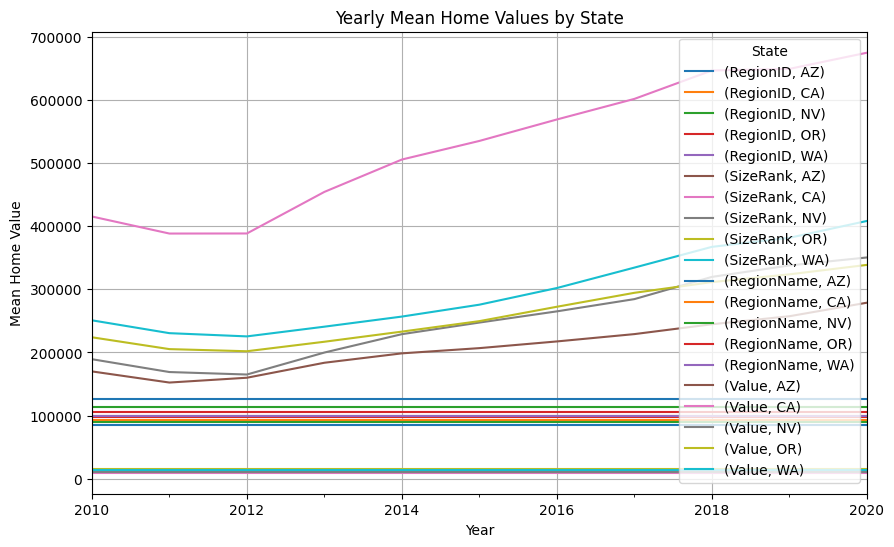

In [81]:
# Resample to yearly frequency using mean as the aggregation function
yearly_mean_home_values = melted_df.groupby(['StateName', pd.Grouper(freq='Y')]).mean().unstack(level=0)

# Plotting
yearly_mean_home_values.plot(kind='line', figsize=(10, 6))

plt.title('Yearly Mean Home Values by State')
plt.xlabel('Year')
plt.ylabel('Mean Home Value')
plt.grid(True)
plt.legend(title='State')
plt.show()

In [83]:
# Melt columns containing '20' in their names
melted_df2 = pd.melt(df, id_vars=['RegionID','SizeRank','RegionName','StateName','State','City','Metro','CountyName'],
                    value_vars=[col for col in df.columns if '20' in col],
                    var_name='Date', value_name='Value')

# Display the melted DataFrame
print(melted_df2)

         RegionID  SizeRank  RegionName StateName State          City  \
0           91940         0       77449        TX    TX           NaN   
1           91982         1       77494        TX    TX           NaN   
2           93144         2       79936        TX    TX       El Paso   
3           62080         3       11368        NY    NY      New York   
4           62093         4       11385        NY    NY      New York   
...           ...       ...         ...       ...   ...           ...   
7546545     80190     30657       50160        IA    IA   Martensdale   
7546546     65355     30657       18081        PA    PA    Hellertown   
7546547     82217     30657       55366        MN    MN           NaN   
7546548     80581     30657       51009        IA    IA       Calumet   
7546549     65963     30657       19490        PA    PA  Collegeville   

                                               Metro         CountyName  \
0               Houston-The Woodlands-Sugar Land

In [85]:
# Convert the strings to datetime objects
melted_df2['Date'] = pd.to_datetime(melted_df2['Date'], format='%d%m%Y')
melted_df2.head()

,RegionID,SizeRank,RegionName,StateName,State,City,Metro,CountyName,Date,Value
0,91940,0,77449,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,"107,261.00"
1,91982,1,77494,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,2000-01-31,"222,569.00"
2,93144,2,79936,TX,TX,El Paso,"El Paso, TX",El Paso County,2000-01-31,"90,009.00"
3,62080,3,11368,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,"188,096.00"
4,62093,4,11385,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,"275,983.00"


In [86]:
melted_df2.head()

,RegionID,SizeRank,RegionName,StateName,State,City,Metro,CountyName,Date,Value
0,91940,0,77449,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,"107,261.00"
1,91982,1,77494,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,2000-01-31,"222,569.00"
2,93144,2,79936,TX,TX,El Paso,"El Paso, TX",El Paso County,2000-01-31,"90,009.00"
3,62080,3,11368,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,"188,096.00"
4,62093,4,11385,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,"275,983.00"


In [90]:
# Define the file path
file_path = "/content/drive/MyDrive/Week2_data/Machine Learning Data Sets/Data Viz Belt Exam OptionA/Data/data-for-tableau.csv"
# Save the DataFrame as a CSV file
melted_df2.to_csv(file_path, index=False)

print("DataFrame saved as CSV file:", file_path)

DataFrame saved as CSV file: /content/drive/MyDrive/Week2_data/Machine Learning Data Sets/Data Viz Belt Exam OptionA/Data/data-for-tableau.csv


**Part 3**

https://public.tableau.com/authoring/BeltExamCMwebazeJunior/Createasetofthetop20zipcodesaccordingtomedianhomevaluecalledMostExpensiveZipCodes#1